In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [141]:
oregon = pd.read_csv('2005_-_2014_Fire_Data.csv')

/Users/johnwu/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,11,14,18,19,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [142]:
oregon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74224 entries, 0 to 74223
Data columns (total 32 columns):
FireYear                  28490 non-null object
Current_District          28489 non-null float64
Current_Unit              28489 non-null float64
FireNumber                28489 non-null float64
FiscalYear                28490 non-null object
FireName                  28474 non-null object
Twn                       25903 non-null object
Rng                       25901 non-null object
Sec                       25861 non-null float64
Subdiv                    22398 non-null object
County                    28465 non-null float64
CauseByDesc               10987 non-null object
GeneralDesc               28030 non-null object
SpecificDesc              24867 non-null object
Cause_Comments            10276 non-null object
General_Restriction       11061 non-null float64
Industrial_Restriction    11060 non-null float64
Burn_Index                2883 non-null float64
RegulatedUseZone    

# Initial inspection of dataframe: 

1. Total of 74224 entries with approximately 28000 entries as the maximum amount of non-null objects.  This means that there must be a lot of rows and entries that have null values.  First step is to remove all rows with complete null values.  

2. A lot of these columns are float objects.  Corresponding these columns to the readme file that came with the dataset, many of these are codes.  It may be useful to convert some of these codes into the actual descriptions seeing that the dataframe itself is not extremely large. 

3. There are a lot of features, however the Burn_Index which is my target feature is rather small (2883 entries).  May need to look elsewhere to gather additional data. 

In [143]:
list(oregon.columns.values)

['FireYear',
 'Current_District',
 'Current_Unit',
 'FireNumber',
 'FiscalYear',
 'FireName',
 'Twn',
 'Rng',
 'Sec',
 'Subdiv',
 'County',
 'CauseByDesc',
 'GeneralDesc',
 'SpecificDesc',
 'Cause_Comments',
 'General_Restriction',
 'Industrial_Restriction',
 'Burn_Index',
 'RegulatedUseZone',
 'Ign_DateTime',
 'ReportDateAndTime',
 'Control_DateTime',
 'Flame_length',
 'Behavior',
 'Fuel',
 'Topography',
 'Aspect',
 'Slope',
 'Elevation',
 'Size_acres',
 'Size_prot',
 'Location']

In [144]:
#creating a key for county columns
County_dict = {'1':'Baker','2':'Benton','3':'Clackmas','4':'Clatsop','5':'Columbia','6':'Coos','7':'Crook','8':'Curry','9':'Deschutes','10':'Douglas','11':'Gilliam','12':'Grant','13':'Harney','14':'Hood River','15':'Jackson','16':'Jefferson','17':'Josephine','18':'Klamth','19':'Lake','20':'Lane','21':'Lincoln','22':'Linn','23':'Malheur','24':'Marion','25':'Morrow','26':'Multnomah','27':'Polk','28':'Sherman','29':'Tillamook','30':'Umatilla','31':'Union','32':'Wallowa','33':'Wasco','34':'Washington','35':'Wheeler','36':'Yamhill','37':'Other State'}

In [145]:
#finding observations where all columns are null values
null_columns = oregon.columns[oregon.isnull().any()]
blanks = oregon[oregon.isnull().all(axis=1)][null_columns]

In [146]:
#creating a list of indices with blank rows
blank_list=list(blanks.index.values)

In [147]:
#filtering out blank rows in new df
oregon = oregon[~oregon.index.isin(blank_list)]

In [148]:
oregon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28490 entries, 416 to 74223
Data columns (total 32 columns):
FireYear                  28490 non-null object
Current_District          28489 non-null float64
Current_Unit              28489 non-null float64
FireNumber                28489 non-null float64
FiscalYear                28490 non-null object
FireName                  28474 non-null object
Twn                       25903 non-null object
Rng                       25901 non-null object
Sec                       25861 non-null float64
Subdiv                    22398 non-null object
County                    28465 non-null float64
CauseByDesc               10987 non-null object
GeneralDesc               28030 non-null object
SpecificDesc              24867 non-null object
Cause_Comments            10276 non-null object
General_Restriction       11061 non-null float64
Industrial_Restriction    11060 non-null float64
Burn_Index                2883 non-null float64
RegulatedUseZone  

# By removing the null values

1. Dataset is significantly less.  28490 vs 74224 entries.  
2. There is location data per the coordinates. 
3. Create some dictionaries to add some descriptions to County

In [149]:
#creating a key for county columns
County_dict = {'1':'Baker','2':'Benton','3':'Clackmas','4':'Clatsop','5':'Columbia','6':'Coos','7':'Crook','8':'Curry','9':'Deschutes','10':'Douglas','11':'Gilliam','12':'Grant','13':'Harney','14':'Hood River','15':'Jackson','16':'Jefferson','17':'Josephine','18':'Klamth','19':'Lake','20':'Lane','21':'Lincoln','22':'Linn','23':'Malheur','24':'Marion','25':'Morrow','26':'Multnomah','27':'Polk','28':'Sherman','29':'Tillamook','30':'Umatilla','31':'Union','32':'Wallowa','33':'Wasco','34':'Washington','35':'Wheeler','36':'Yamhill','37':'Other State'}

In [150]:
#adding county name to df
oregon['County'].fillna(0,inplace=True)
oregon['County'] = [int(cell) for cell in oregon['County']]
oregon['County']= [str(num) for num in oregon['County']]
oregon['County_Name'] = oregon['County'].map(County_dict)
oregon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28490 entries, 416 to 74223
Data columns (total 33 columns):
FireYear                  28490 non-null object
Current_District          28489 non-null float64
Current_Unit              28489 non-null float64
FireNumber                28489 non-null float64
FiscalYear                28490 non-null object
FireName                  28474 non-null object
Twn                       25903 non-null object
Rng                       25901 non-null object
Sec                       25861 non-null float64
Subdiv                    22398 non-null object
County                    28490 non-null object
CauseByDesc               10987 non-null object
GeneralDesc               28030 non-null object
SpecificDesc              24867 non-null object
Cause_Comments            10276 non-null object
General_Restriction       11061 non-null float64
Industrial_Restriction    11060 non-null float64
Burn_Index                2883 non-null float64
RegulatedUseZone   

In [204]:
#reindexing dataframe by FireNumber
oregon = oregon.reset_index(drop=True)

In [205]:
#Before plotting, need to change FireYear to datetime object, first investigate what type of object is the report date and time

oregon.loc[0,'ReportDateAndTime']

'07/31/2005 12:00:00 AM'

In [220]:
type(oregon.loc[0,'ReportDateAndTime'])

str

In [219]:
from datetime import datetime
#oregon['ReportDateAndTime']= [pd.to_datetime(cell, format='%M%d%Y') for cell in oregon['FireYear']]
oregon['ReportDateAndTime']=[datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p') for x in oregon['ReportDateAndTime']]
#oregon['ReportDateAndTime']=datetime.strptime(oregon['ReportDateAndTime'],'%m/%d/%Y %H:%M:%S %p')

TypeError: strptime() argument 1 must be str, not float

In [152]:
#creating dfs with different traits
location_cols = [['Current_District','FireName','Subdiv','County','Elevation','Location', 'County_Name']]
behavior_cols = [['CausebyDesc','GeneralDesc','SpecificDesc','Cause_Comments','Burn_Index','Flame_length','Behavior','Fuel','Topography','Aspect','Slope','Size_acres']]

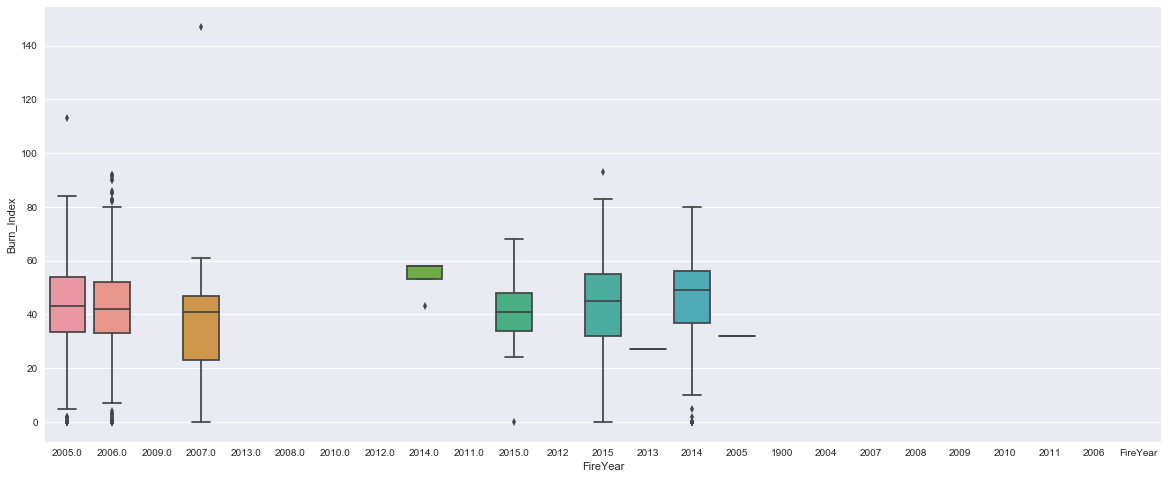

In [168]:
#investigating spread of Burn_Index
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(20,8)
_ = sns.boxplot(x='FireYear',y='Burn_Index',data=oregon)
sns.plt.show()

There seeems to be an outlier in 2007 with a extremely high burn index.   